# Import Laiberaries 

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import time
from IPython.display import clear_output

# Data Stream Simulation 

The function below illustrates the implmentation of data stream simulation

In [23]:
def data_stream_simulation(length = 400):
    t = np.arange(0 , length , 1)
    seasonal_pattern = np.sin(t / 20) #represent seasonality
    noise = np.random.normal(0 , 0.1 , size=length) #Random noise
    trend = t * 0.01  # Small upward trend
    data_stream = seasonal_pattern + noise + trend
    return data_stream

# Exponential Moving Average (EMA) for anomaly detection 

In [24]:
def ema_anomaly_detection(stream, alpha=0.1, threshold=3):
    ema = []
    anomalies = []
    ema_value = stream[0]  # Initialize EMA with the first value in the stream
    
    for i, value in enumerate(stream):
        ema_value = alpha * value + (1 - alpha) * ema_value  # Update EMA
        ema.append(ema_value)
        
        # Flag anomalies where the data deviates significantly from the EMA
        if abs(value - ema_value) > threshold * np.std(stream[:i+1]):  # Simple anomaly condition
            anomalies.append(i)
    
    return ema, anomalies 

# Real time plotting with anomaly detection 

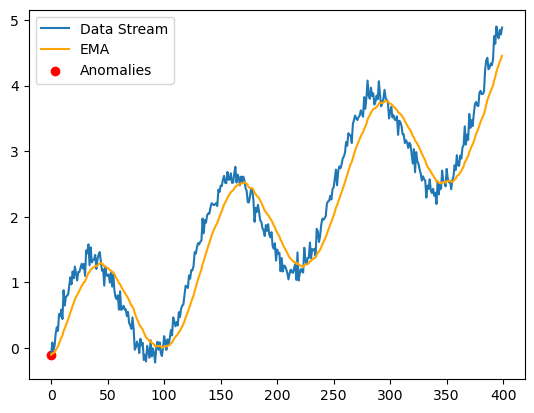

In [25]:
def real_time_plot_data():
    stream = data_stream_simulation() #Simulated data stream
    
    alpha = 0.1
    threshold = 3
    ema , anomalies =  ema_anomaly_detection(stream , alpha , threshold)
    
    # Initialize Plot
    plt.figure()
    
    for i in range(len(stream)):
        #plot real-time data and anomalies
        clear_output(wait = True)
        plt.plot(stream[:i+1] , label = 'Data Stream')
        plt.plot(ema[:i+1] , label = 'EMA' , color = 'orange')
        
        
        detected_anomalies = [j for j in anomalies if j<= i]
        if detected_anomalies:
            plt.scatter(detected_anomalies, [stream[j] for j in detected_anomalies] , color = 'red' , label='Anomalies')
        plt.legend()
        plt.pause(0.01) # Pause to simulate real-time plotting
    
    
    plt.show()
    
real_time_plot_data()